In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: P0886040401PNS003SRSPEC003B.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.051e-03 +/- 6.557e-04 (55.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.733e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040401PNS003BGSPEC003B.FTZ
  Background Exposure Time: 1.733e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY4.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040401PNS003SRCARF003B.FTZ



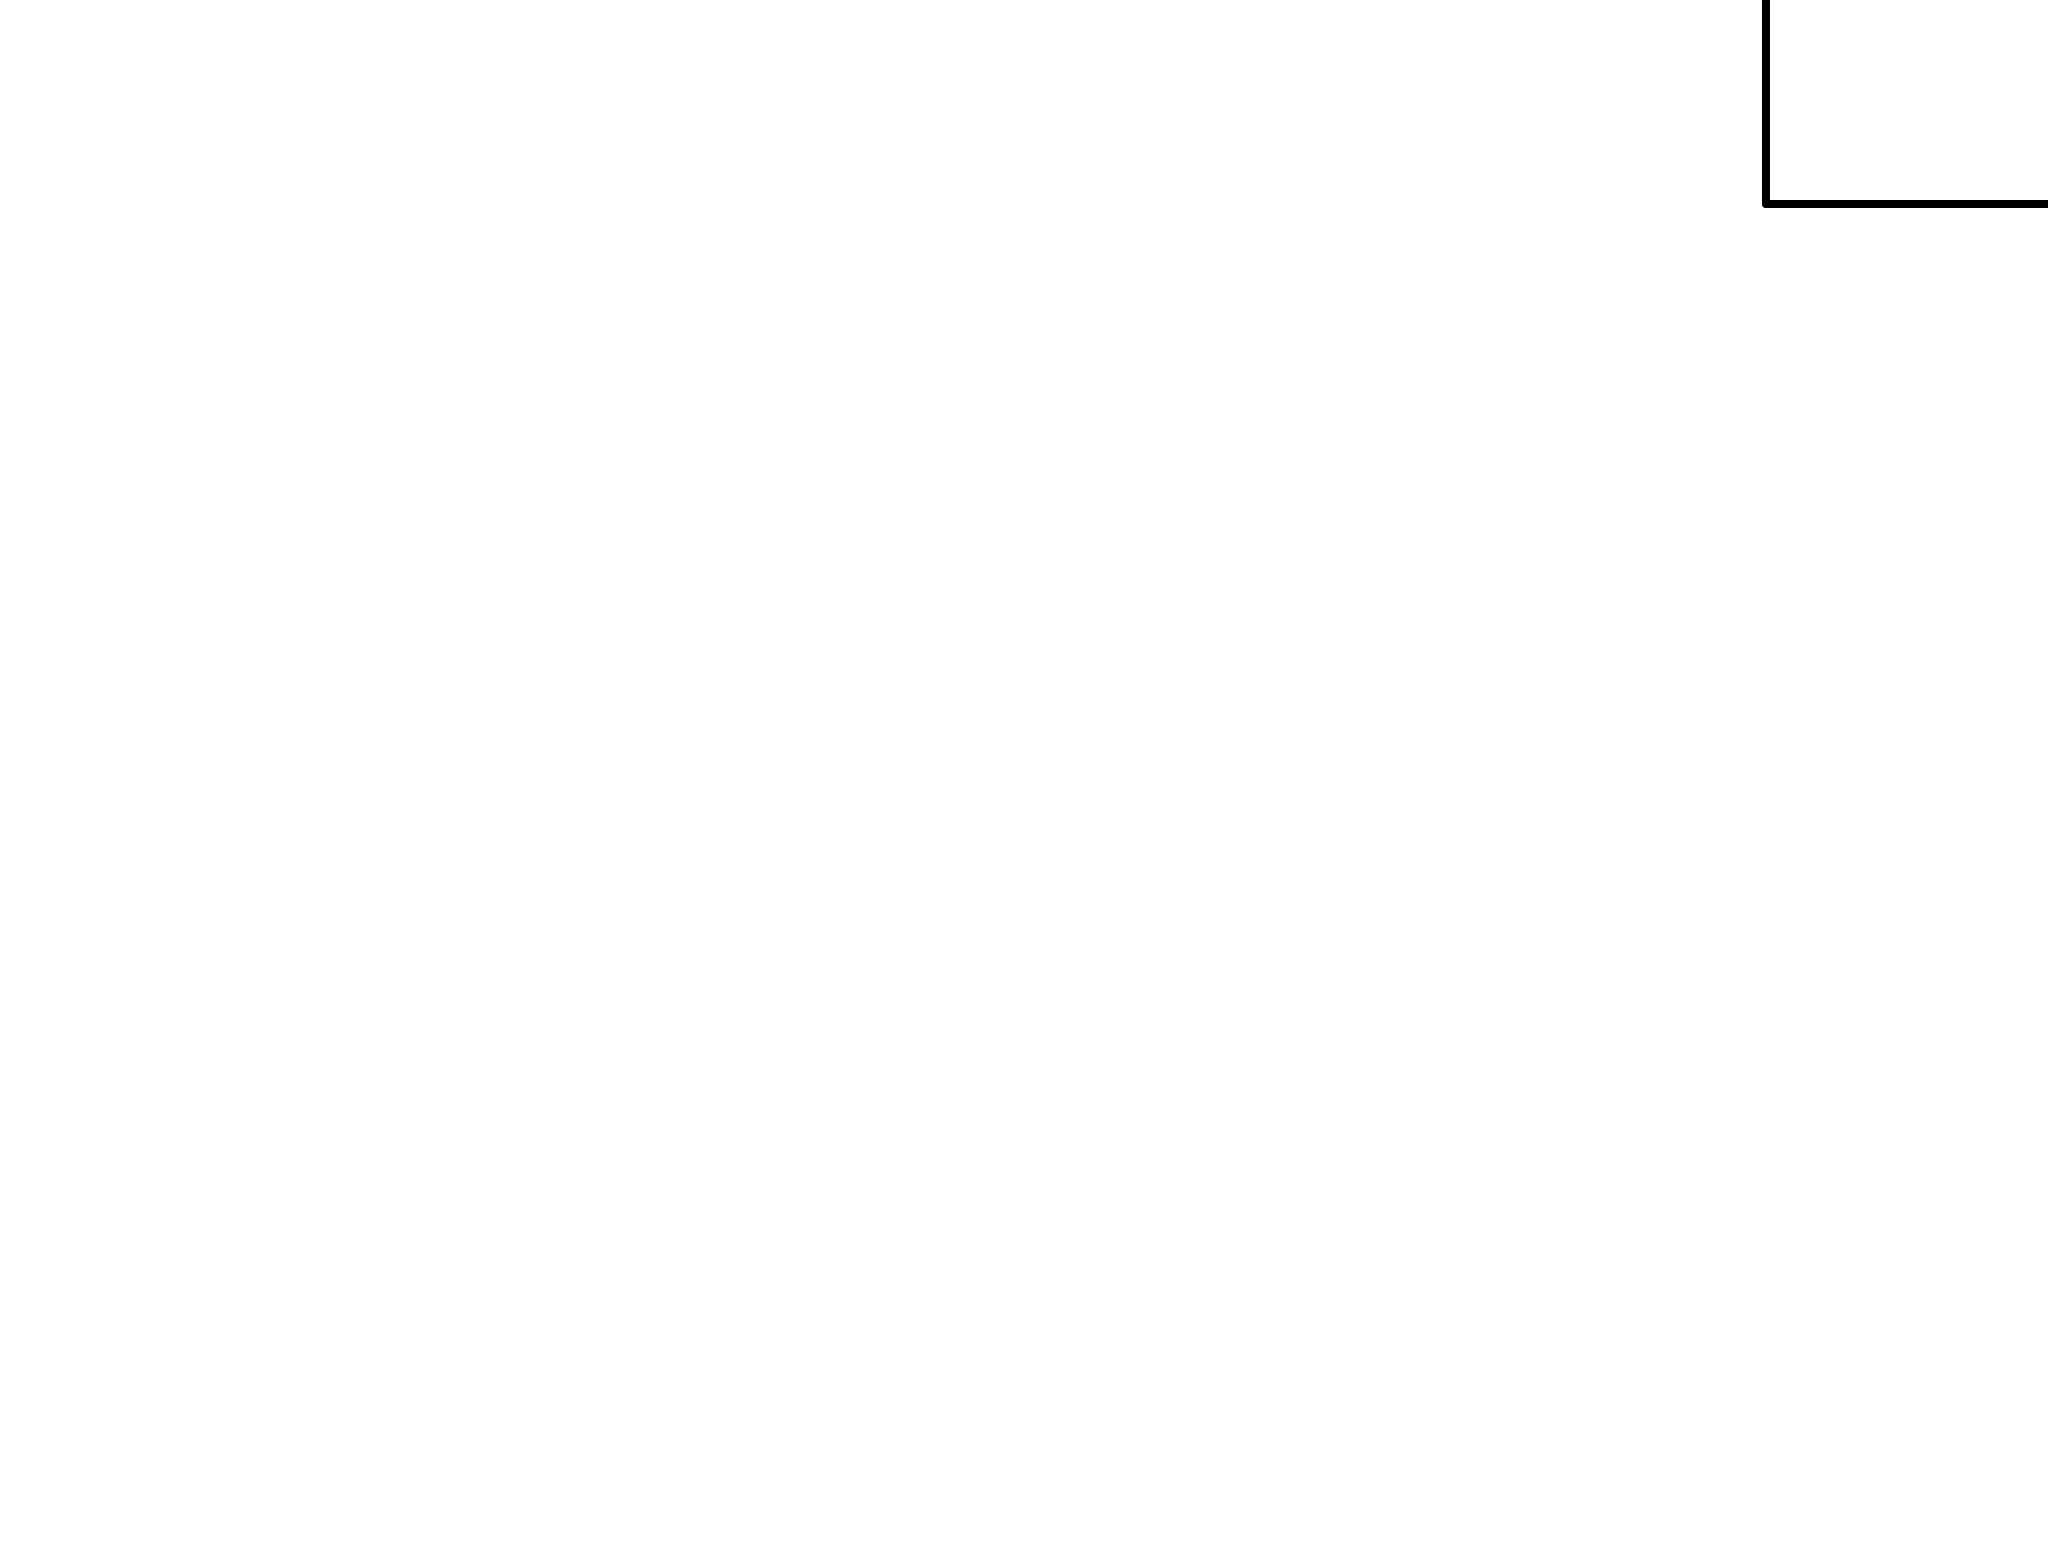

In [3]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.250763e+12     using 6 bins.

Tes

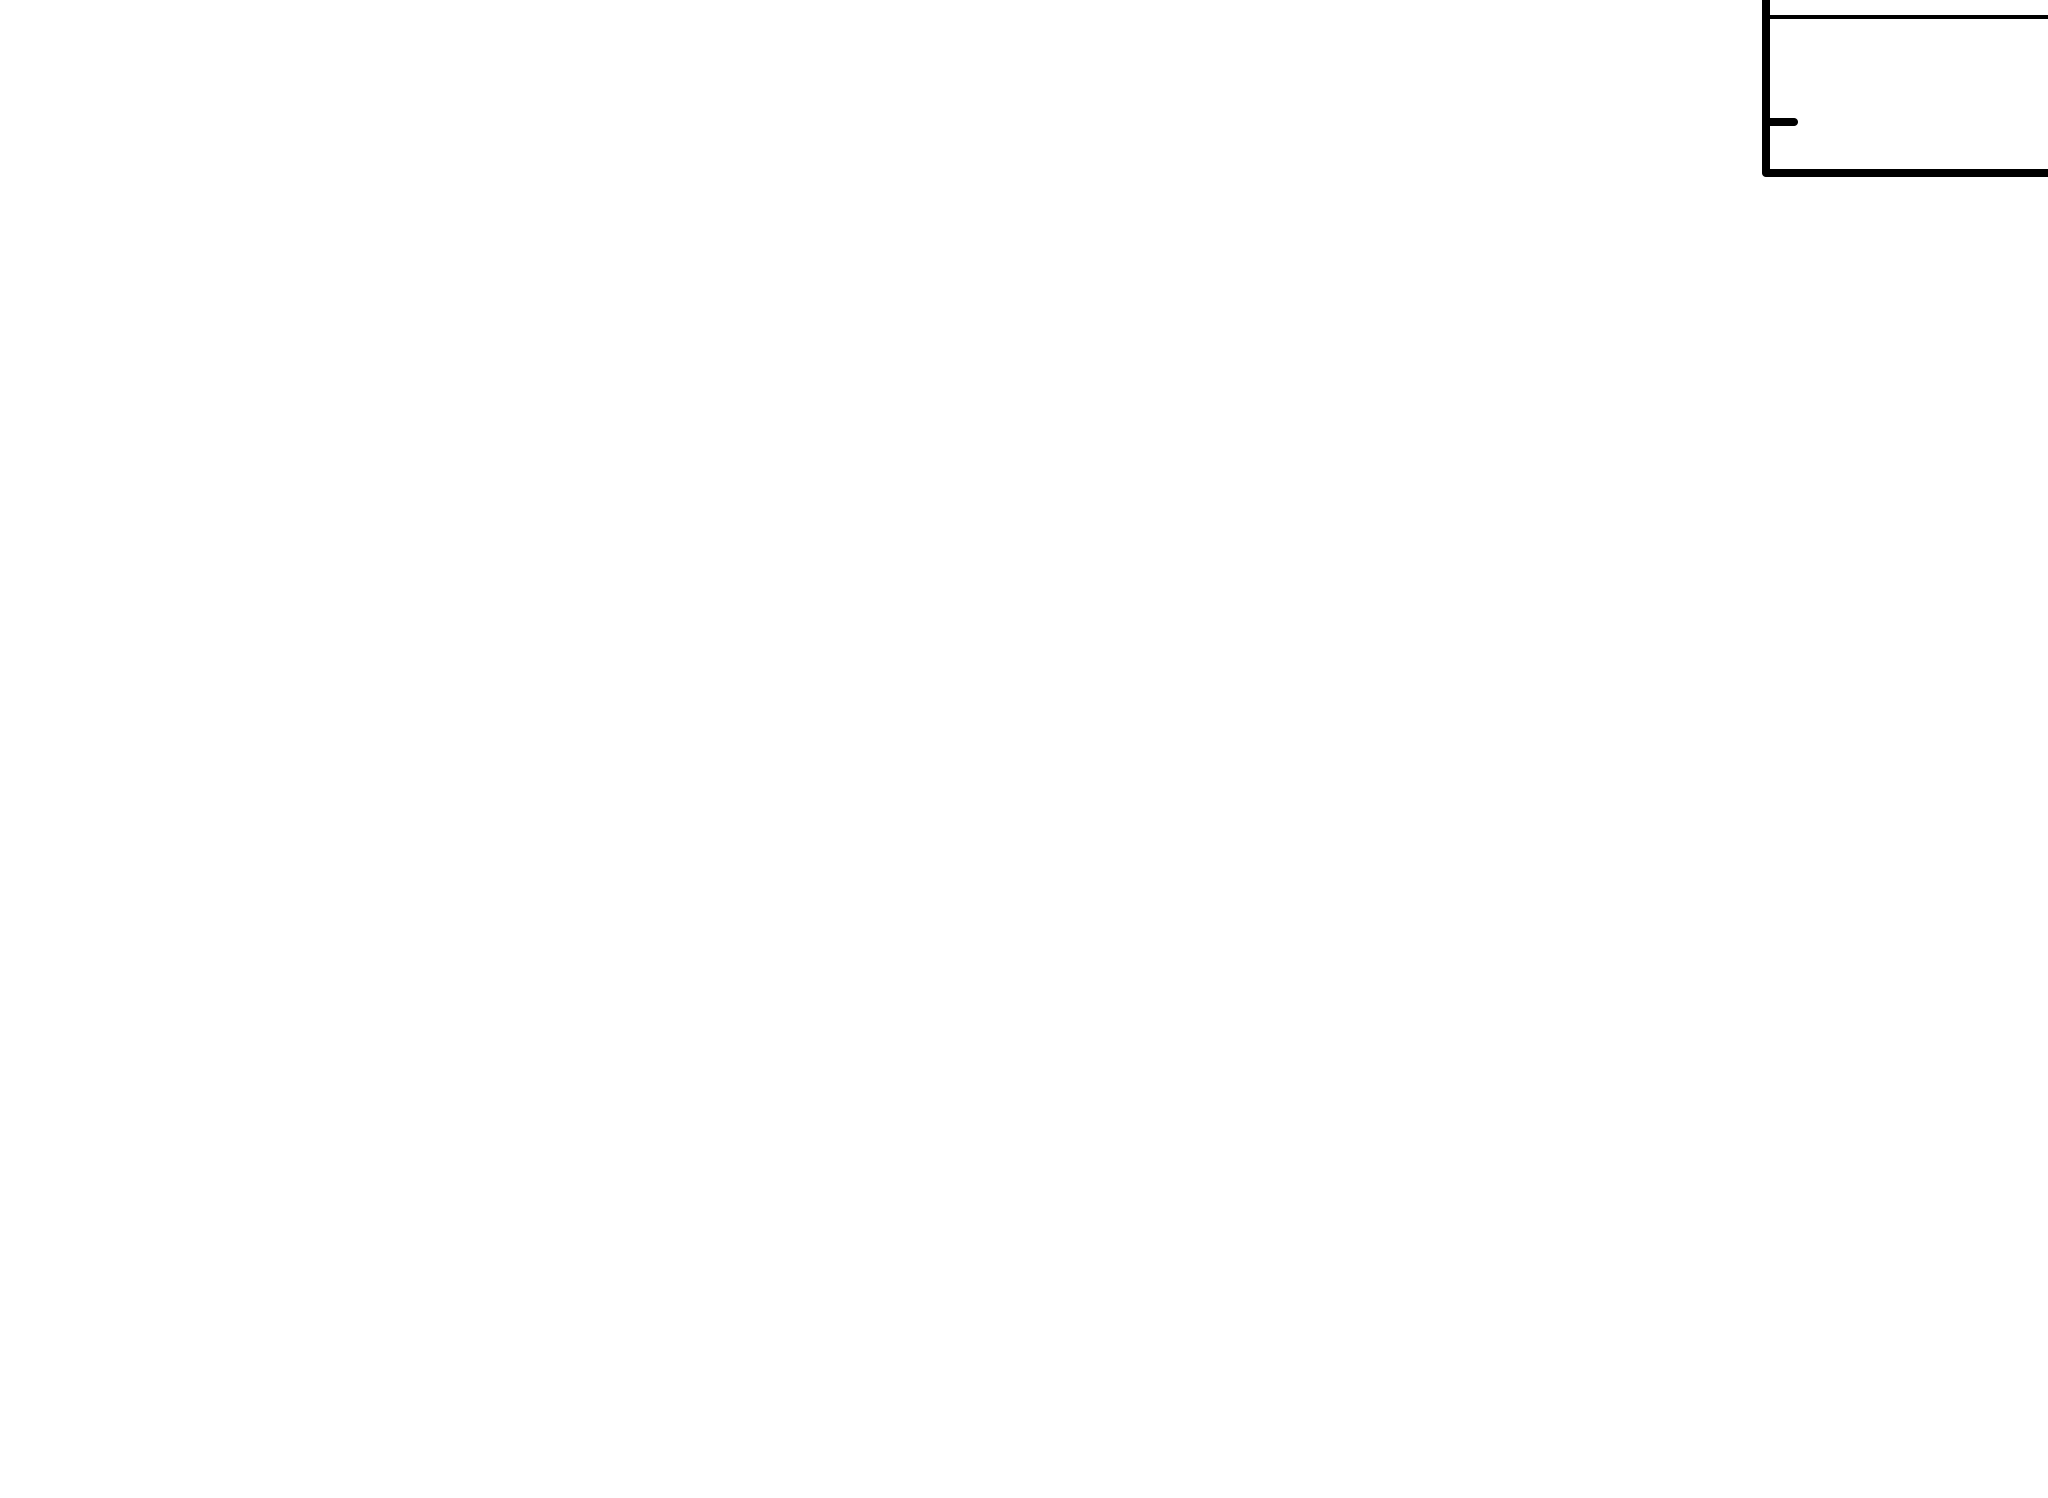

In [4]:
#spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
     1            0      0.52084    (-0.00871394,0.512126)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 5.01291e-17 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 1.61344e-17 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 1.61344e-17 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
     2     0.306245        0.953    (-0.372458,0.274298)



Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.953544e+10     using 6 bins.

Test statistic : Chi-Squared              9.953544e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.88525      2.09678      -1      0.351807       7.28287   9.63086e-06
3.40336      306025       -2      0.202757       4.42272   1.29276e-05
1.85407      91868        -3      0.292894       4.39115   1.44180e-05
1.8

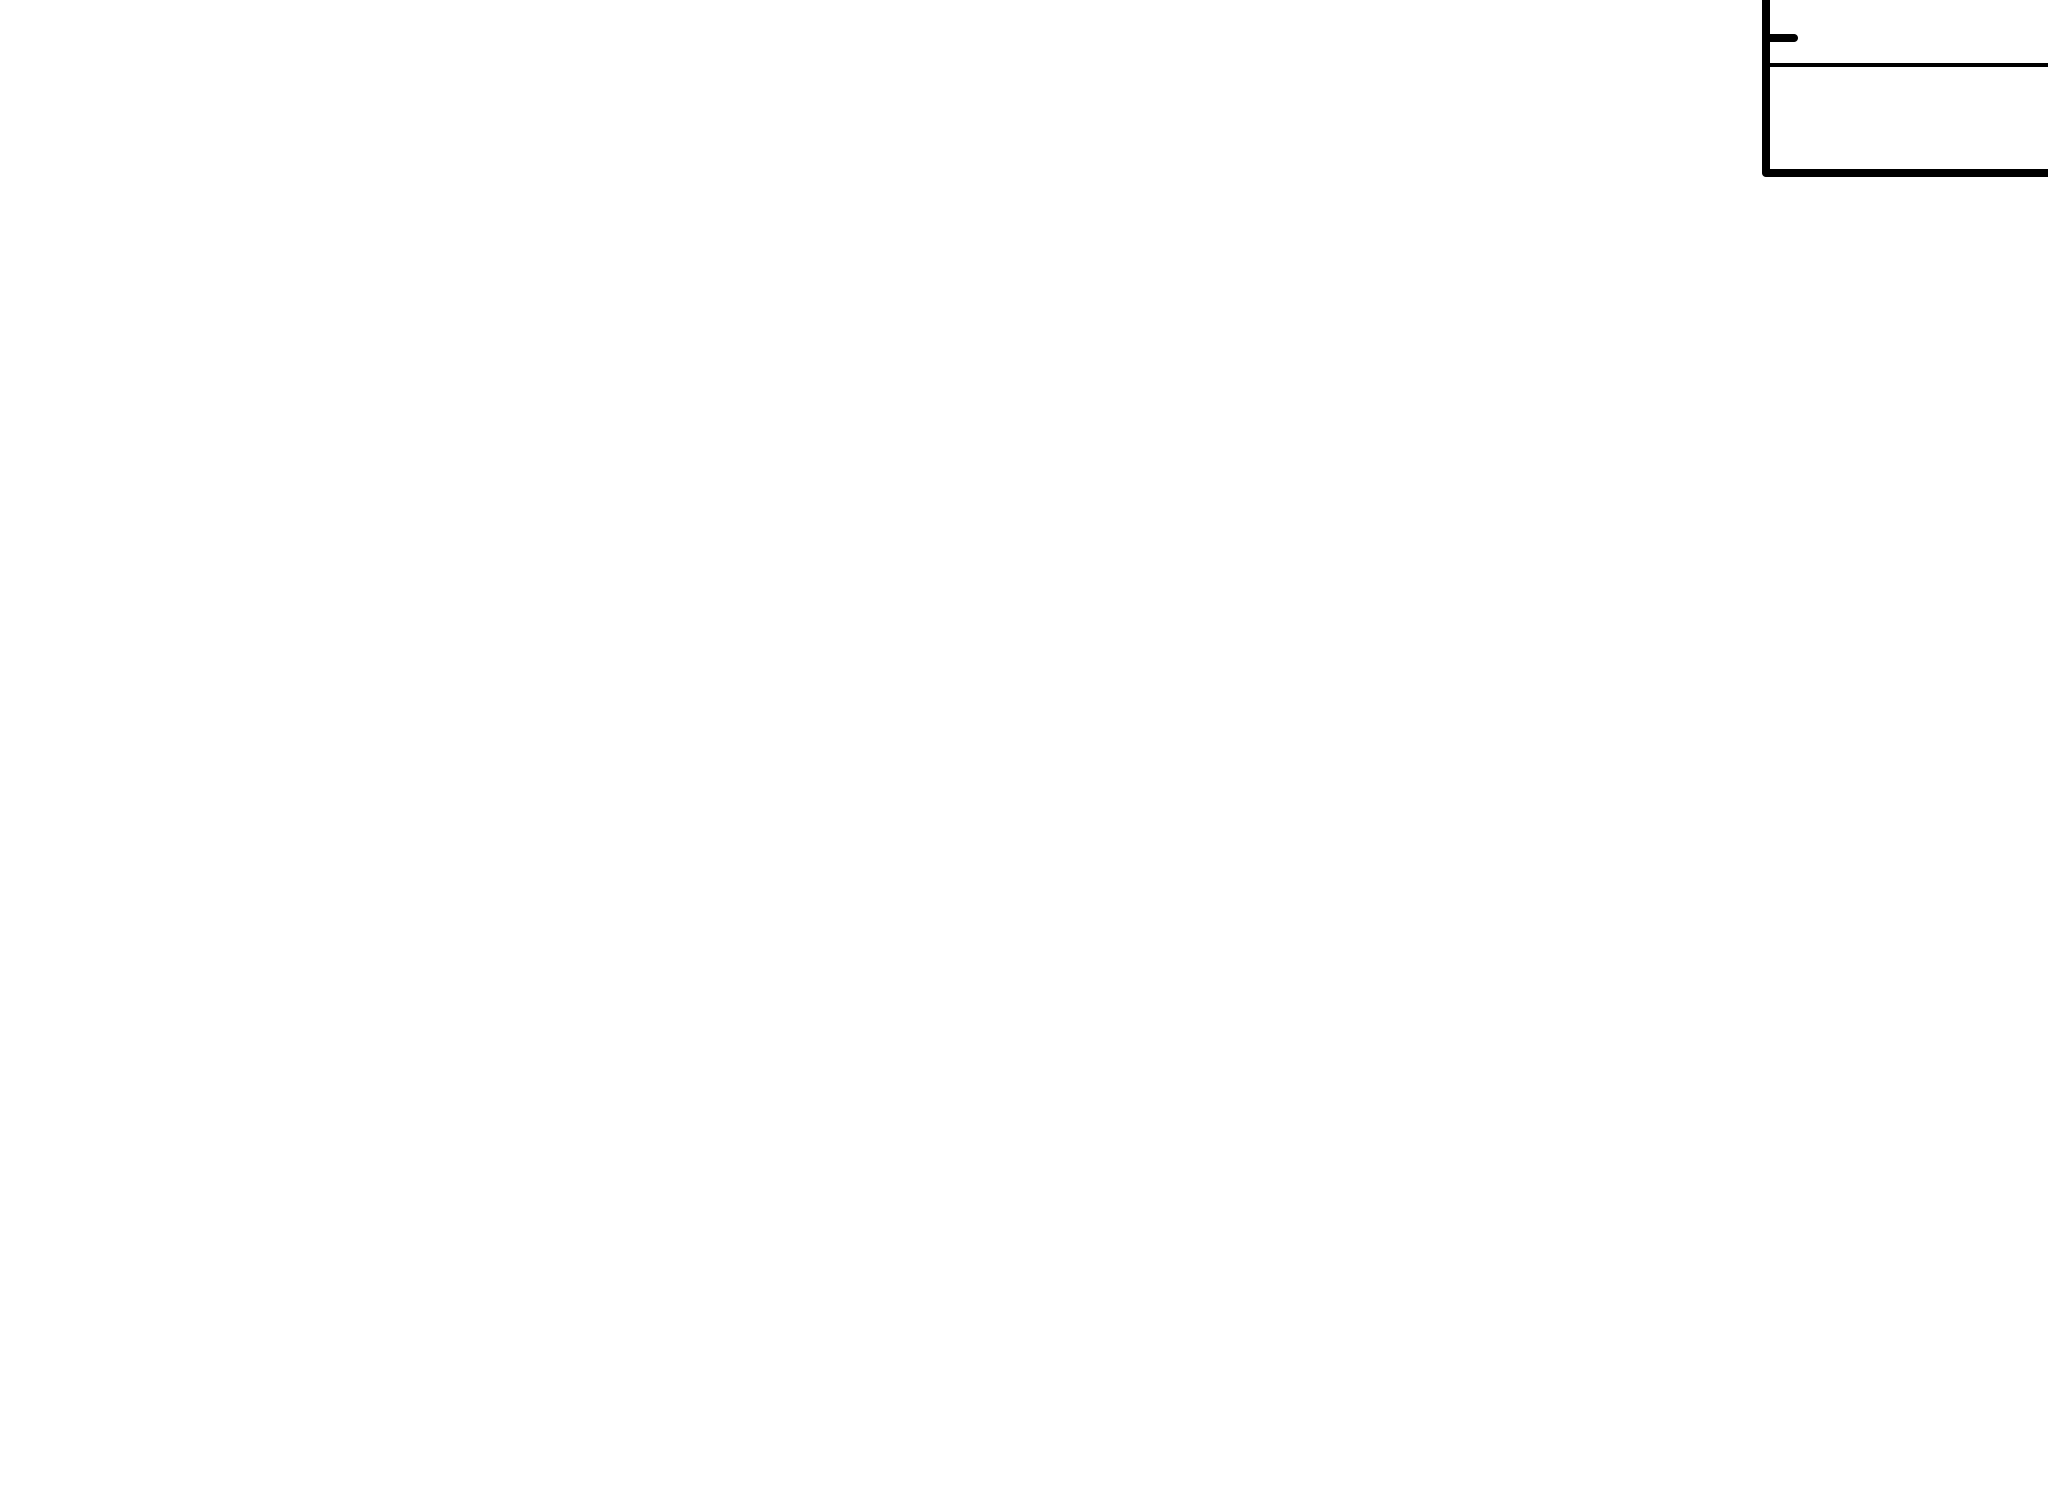

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1    0.0949851     0.645973    (-0.203244,0.347743)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 1.97792

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2      0.98903            0    (-3.57536,-4.56439)



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.538447e+10     using 6 bins.

Test statistic : Chi-Squared              1.538447e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
4.25054      1.72371      -3      0.992179       1.11293   4.8

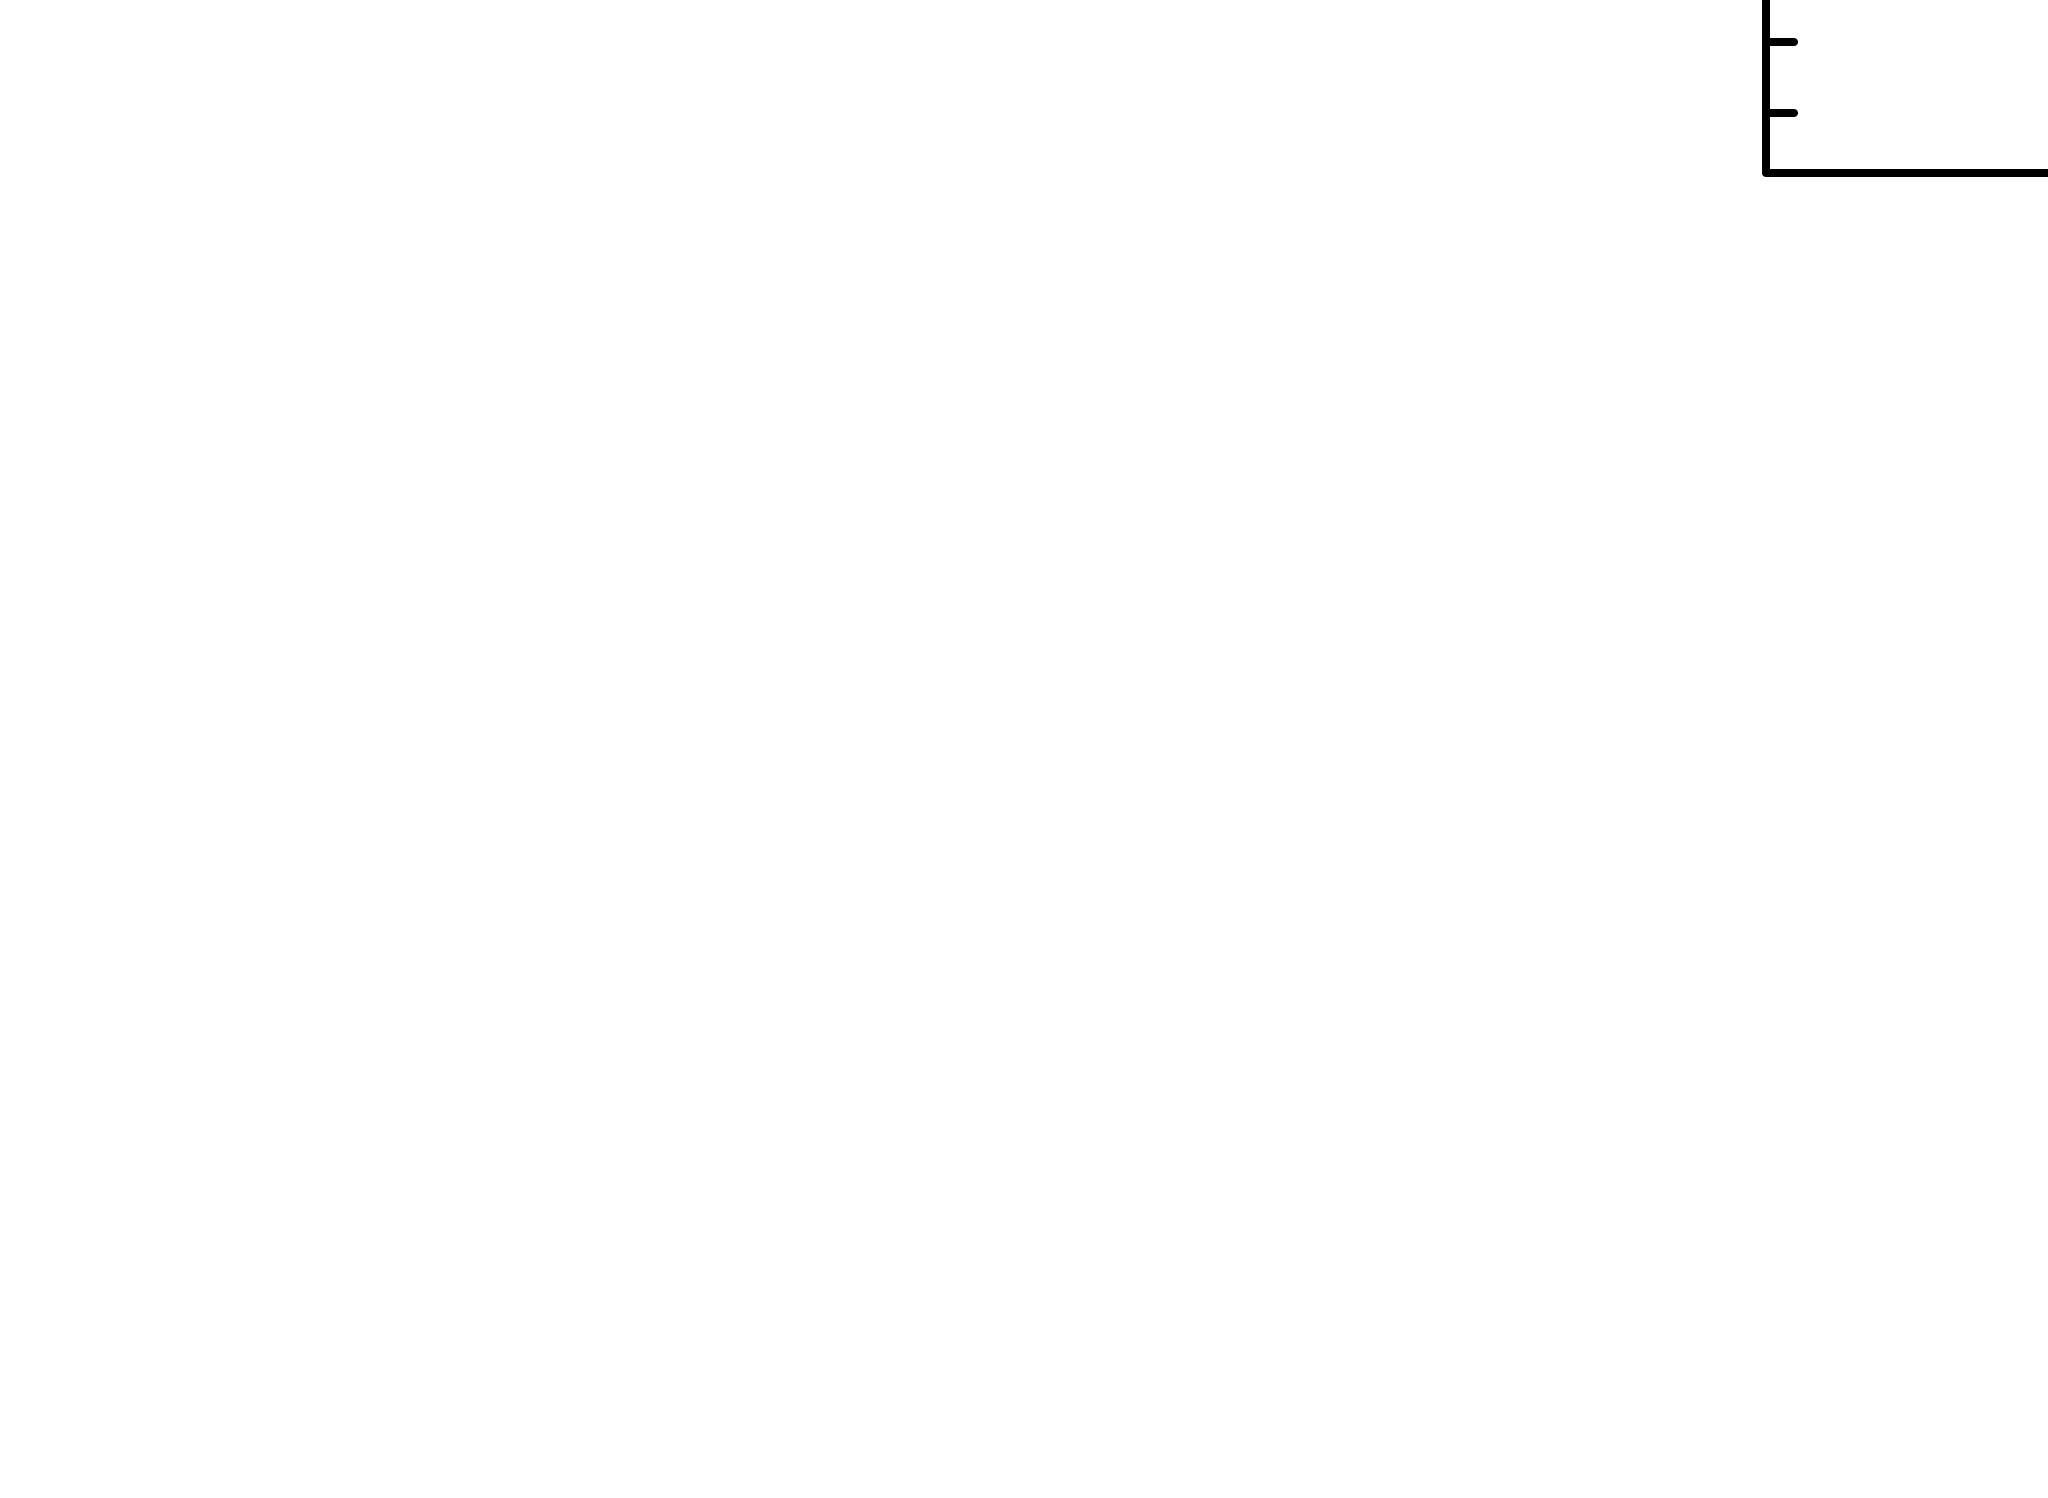

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
 renorm: no renormalization necessary
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
0.814618     0.279772     -3      0.302025       3.78303   3.45195e-05
0.814343     11.3277      -4      0.304240       3.75736   3.46066e-05
0.814338     0.359585     -5      0.303947       3.76101   3.45952e-05
 Variances and Principal Axes
                 1        2        5  
 2.7884E-11| -0.0000  -0.0000   1.0000  
 1.2384E-02|  0.9994   0.0344   0.0000  
 3.8610E+00| -0.0344   0.9994  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   1.693e-02  -1.322e-01   7.239e-07
  -1.322e-01   3.856e+00  -3.354e-06
   7.239e-07  -3.354e-06   6.070e-11
------------------------------------

Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.665114e+11     using 6 bins.

Test statistic : Chi-Squared              6.665114e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
13.4479      2.59017      -2     0.0345600      0.611462   2.14106e-06
12.3318      1.17854e+06  -2      0.353401       1.96661   6.62099e-06
2.7416       531544       -3      0.509038       2.27196   1.59113e-05
1

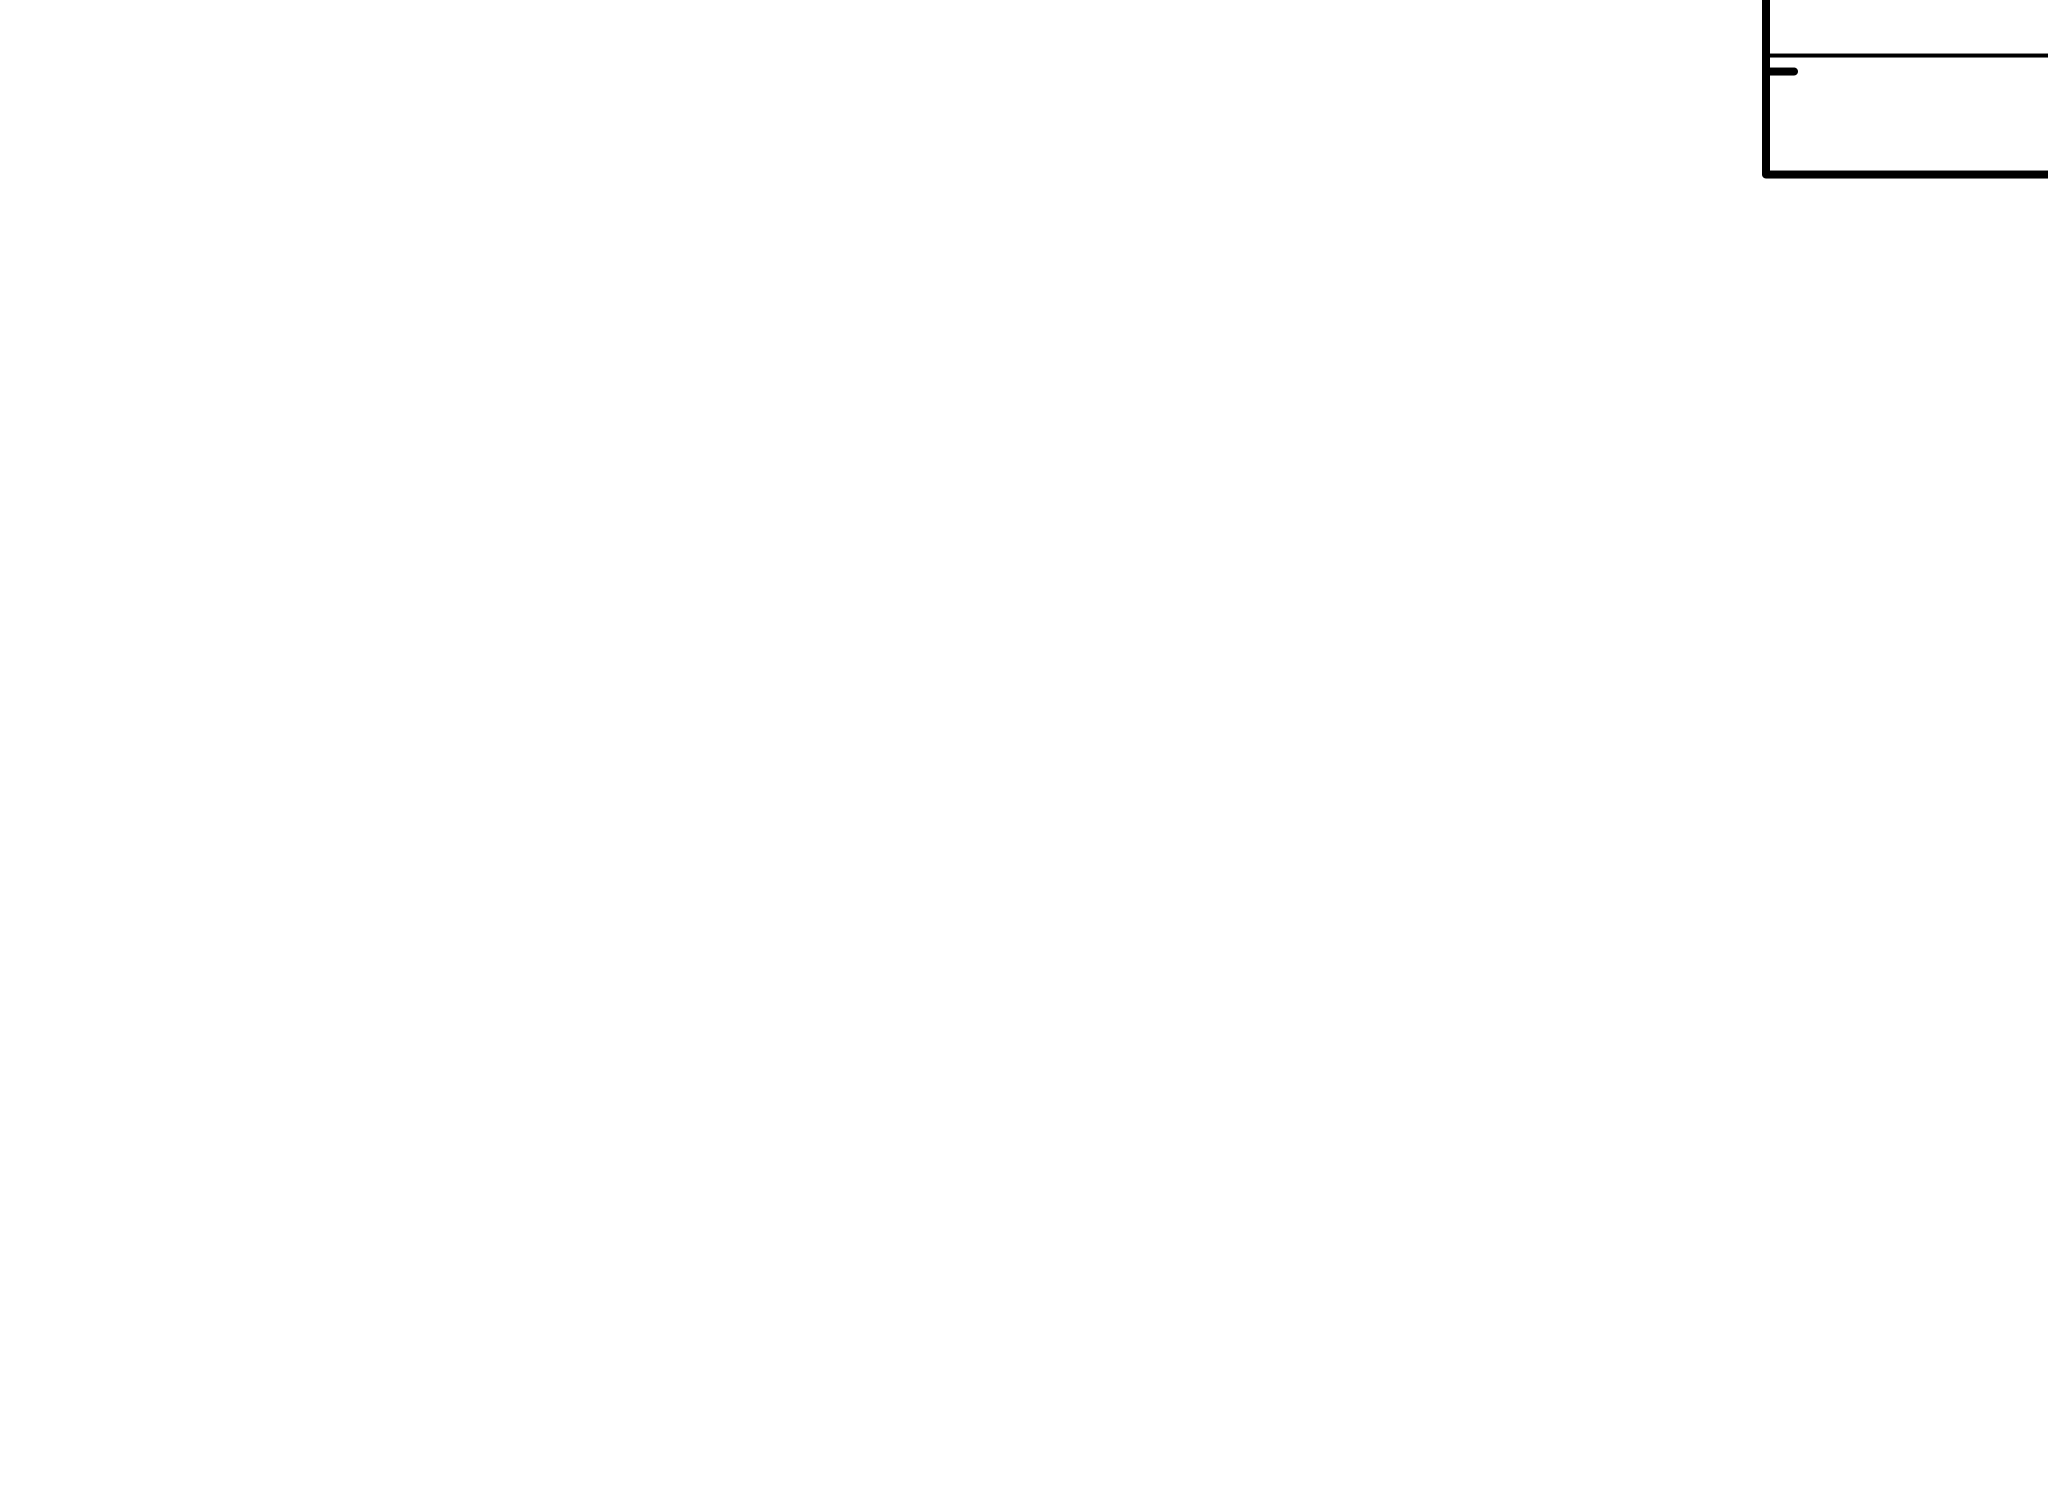

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.124333     0.968706    (-0.312732,0.531641)
 Parameter   Confidence Range (2.706)
     2      1.16986      3.95224    (-0.977238,1.80515)


In [12]:
np.savetxt('../spec17_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.1964e-05 photons (4.9197e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
plx = 0.7091
d_kpc = 1/plx
F_x = 4.6601*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.1085664946404801e+31


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

1.410238330277817
31.044761748320443


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*18.57)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  3.9191266568550593e-13
F_x / F_opt:  -0.9247940628558565
